In [4]:
import pandas as pd

telefonkunden = pd.read_csv('telefonkunden.csv')
telefonkunden.head()
#telefonkunden.shape

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
# Trainings und Testdaten split

X = telefonkunden.drop(columns=['custcat'])
Y = telefonkunden.custcat
X.head
Y.head

<bound method NDFrame.head of 0      1
1      4
2      3
3      1
4      3
      ..
995    1
996    1
997    4
998    3
999    2
Name: custcat, Length: 1000, dtype: int64>

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_training, x_test, y_training, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)
knn = KNeighborsClassifier(n_neighbors=14)
vorhersage_scikit = knn.fit(x_training, y_training)

In [22]:
vorhersage_scikit = knn.predict(x_test)

In [23]:
#Accuracy Score mit n_neighbors = 3 --> 0,375
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, vorhersage_scikit))

0.355


In [24]:
#Kreuzvalidierung mit 3 n_neigbors
#Ergebnis: Kein großer Bias unter den Gruppen
import numpy as np
from sklearn.model_selection import cross_val_score

klassifikator_kreuzvalidierung = KNeighborsClassifier(n_neighbors=3)

kreuzvalidierung_genauigkeiten = cross_val_score(klassifikator_kreuzvalidierung, X, Y, cv=5)

print(kreuzvalidierung_genauigkeiten)
print(np.mean(kreuzvalidierung_genauigkeiten))

[0.32  0.31  0.265 0.285 0.355]
0.307


In [25]:
#Funktion die verschiedene Werte für n_neigbors systematisch testet
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

k_grid = {'n_neighbors' : np.arange(1,100)}

knn_grid = GridSearchCV(knn2, k_grid, cv=5)

knn_grid.fit(X, Y)

#n_neigbors = 84 ist nach dieser Methode der beste Wert zwischen 1-100
knn_grid.best_estimator_

knn_grid.best_score_


np.float64(0.374)

In [17]:
#Mittelwert für alle Scores 1-100
scores = knn_grid.cv_results_['mean_test_score']
print (scores)

[0.291 0.301 0.307 0.312 0.31  0.316 0.312 0.323 0.326 0.329 0.327 0.33
 0.351 0.331 0.344 0.338 0.324 0.335 0.339 0.33  0.336 0.341 0.339 0.35
 0.35  0.35  0.348 0.358 0.353 0.351 0.35  0.342 0.354 0.353 0.343 0.35
 0.348 0.352 0.348 0.358 0.358 0.365 0.36  0.351 0.354 0.354 0.355 0.361
 0.361 0.353 0.355 0.357 0.36  0.359 0.359 0.357 0.361 0.357 0.359 0.36
 0.359 0.364 0.364 0.362 0.367 0.362 0.361 0.369 0.373 0.37  0.369 0.371
 0.364 0.371 0.369 0.364 0.365 0.368 0.373 0.37  0.368 0.368 0.369 0.374
 0.373 0.37  0.371 0.374 0.373 0.366 0.369 0.368 0.366 0.368 0.366 0.366
 0.368 0.369 0.368]


Text(0.5, 0, 'k')

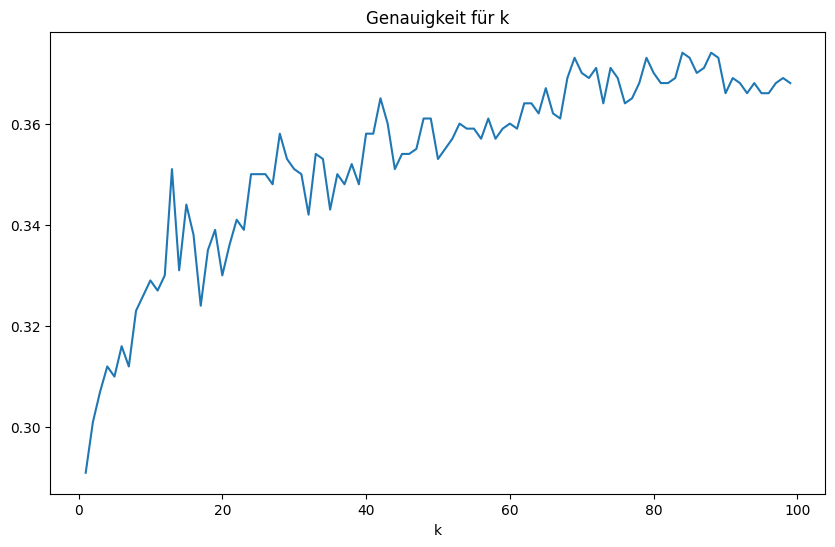

In [20]:
import	matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,100),scores)

plt.title('Genauigkeit für k')
plt.xlabel('k')


In [27]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 621.2 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 621.2 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 621.2 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 621.2 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 621.2 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 364.6 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 364.6 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 364.6 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 364.6 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 364.6 kB/s eta 0:00:02
   ----------

c:\Users\031688\AppData\Local\anaconda3\envs\bigdata2\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


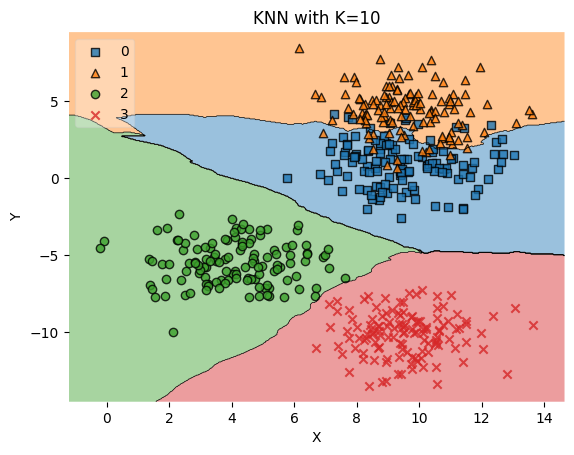

c:\Users\031688\AppData\Local\anaconda3\envs\bigdata2\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


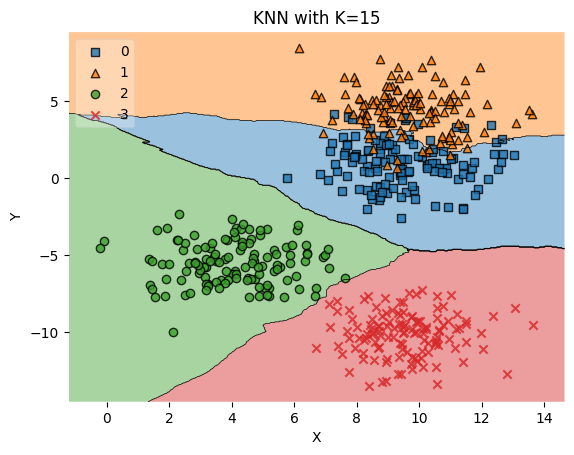

c:\Users\031688\AppData\Local\anaconda3\envs\bigdata2\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


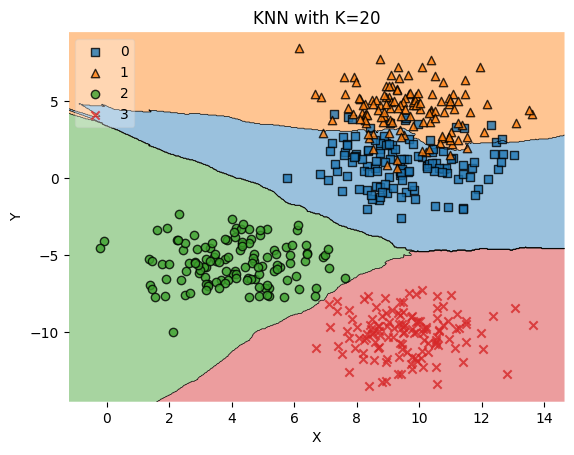

In [32]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

# Create and train KNN models with different K values
for k in [10, 15, 20]:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_regions(X, y, clf=knn, legend=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'KNN with K={k}')
    plt.show()